### Embeddings Exploration

#### Explore the pre-trained embeddings by using them as features for binary classification models.

##### Install the necessary libraries in the current session.

In [1]:
%pip install sentence-transformers

StatementMeta(, a3a548b3-3ce9-406d-b452-81501f4420dc, -1, Finished, Available)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 2.1 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... - done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 40.5 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 91.5 MB/s eta 0:00:00ta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 163.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 168.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 79.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 181.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 100.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 619.9/619.9 MB 7.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.1/317.1 MB 15.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.3/63.3 MB 55.7 MB/s eta 0:00:0000:0100:01
    

##### Load the necessary libraries.

In [2]:
import pandas as pd
import numpy as np
import itertools

from sentence_transformers import SentenceTransformer

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics.pairwise import cosine_similarity

from matplotlib import pyplot as plt

StatementMeta(, a3a548b3-3ce9-406d-b452-81501f4420dc, 9, Finished, Available)

##### Load the prepared datasets into Pandas Dataframe objects.

In [3]:
df_train = pd.read_csv('/lakehouse/default/Files/news_data/df_sample_train.csv')
df_test = pd.read_csv('/lakehouse/default/Files/news_data/df_sample_test.csv')

df_train

StatementMeta(, a3a548b3-3ce9-406d-b452-81501f4420dc, 10, Finished, Available)

,category,news
0,HEALTHY LIVING,The Hiking Trip That Helped Me Reconnect With ...
1,WELLNESS,Michelle Obama Wants You To Drink More Water B...
2,WELLNESS,9 Sins Against Superfoods You've probably seen...
3,HEALTHY LIVING,Being Tall Might Up Your Risk For This Cancer ...
4,HEALTHY LIVING,Why Is It So Hard to Forgive Yourself? It won'...
...,...,...
12050,WELLNESS,Provigil: Narcolepsy Drug Being Taken By Peopl...
12051,HEALTHY LIVING,Debunking The Holiday Suicide Myth
12052,HEALTHY LIVING,Here's The Real Truth About Mental Health It's...
12053,WELLNESS,Tamiflu Approved By FDA For Infants With New F...


##### Here we load the [*Sentence Transformers*](https://www.sbert.net/index.html) model and define a simple function to compute embeddings using the *news* column of a Pandas Dataframe.

In [4]:
model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')

def get_embeddings(df):
    embeddings = model.encode(df['news'].tolist(), batch_size=256)
    return embeddings

StatementMeta(, a3a548b3-3ce9-406d-b452-81501f4420dc, 11, Finished, Available)

StatementMeta(, a3a548b3-3ce9-406d-b452-81501f4420dc, 21, Finished, Available)

##### We then compute embeddings for the training and testing datasets.

In [5]:
embeddings_train = get_embeddings(df_train)
embeddings_test = get_embeddings(df_test)

print(embeddings_train.shape)
print(embeddings_test.shape)

StatementMeta(, a3a548b3-3ce9-406d-b452-81501f4420dc, 12, Finished, Available)

(12055, 384)
(668, 384)


##### Here we fit a simple Logistic Regression model to the training dataset, using its embeddings as features.

In [6]:
lr_model = LogisticRegression(n_jobs=-1, max_iter=1000)
lr_model.fit(embeddings_train, df_train['category'])

StatementMeta(, a3a548b3-3ce9-406d-b452-81501f4420dc, 13, Finished, Available)

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

LogisticRegression(max_iter=1000, n_jobs=-1)

##### We then get predictions for the testing dataset and print the classification report.

In [7]:
pred = lr_model.predict(embeddings_test)
print(classification_report(y_true=df_test['category'], y_pred=pred))

StatementMeta(, a3a548b3-3ce9-406d-b452-81501f4420dc, 14, Finished, Available)

                precision    recall  f1-score   support

HEALTHY LIVING       0.69      0.61      0.65       321
      WELLNESS       0.67      0.74      0.71       347

      accuracy                           0.68       668
     macro avg       0.68      0.68      0.68       668
  weighted avg       0.68      0.68      0.68       668



##### The function below is used to plot a confusion matrix for the classification results.

In [8]:
# code borrowed from scikit-learn.org
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        # print("Normalized confusion matrix")
    else:
        # print('Confusion matrix, without normalization')
        pass
    # print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment='center', fontsize=8,
                 color='white' if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

StatementMeta(, a3a548b3-3ce9-406d-b452-81501f4420dc, 15, Finished, Available)

##### Plot the confusion matrix for the testing dataset.

StatementMeta(, a3a548b3-3ce9-406d-b452-81501f4420dc, 16, Finished, Available)

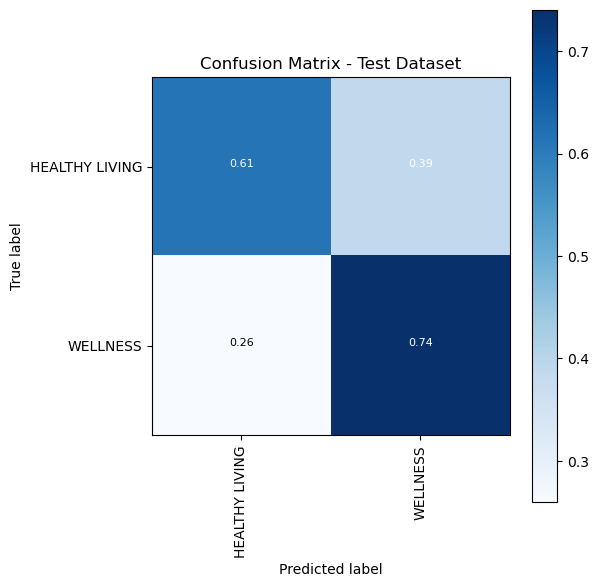

In [9]:
classes = df_train['category'].unique().tolist()
classes = sorted(classes)

cm_test = confusion_matrix(y_true=df_test['category'], y_pred=pred)

np.set_printoptions(precision=2)
plt.figure(figsize=(6,6))
plot_confusion_matrix(cm=cm_test, classes=classes, title='Confusion Matrix - Test Dataset', normalize=True)

##### For comparison with the Logistic Regression model, here we perform classification of a news article by getting its category from the most similar article in the training data. For similarity computation, we use Cosine Similarity.

##### First, we create a dictionary where, for each news category, we assign a list of embeddings from all articles in that category.

In [10]:
embeddings_train_dict = {}

for label in classes:
    embeddings_train_dict[label] = []

for i in range(len(df_train)):
    label = df_train.loc[i, 'category']
    embeddings_train_dict[label] = embeddings_train_dict[label] + [embeddings_train[i]]

StatementMeta(, a3a548b3-3ce9-406d-b452-81501f4420dc, 17, Finished, Available)

##### Then we go through the testing dataset and compute a list of similarities for each news article with all articles in the training set for a given category and get the maximum similarity score as the score associated that category.

##### We run that procedure for all categories and at the end, we get the category with the higher similarity score as the classified category for a given news article in the testing dataset.

In [11]:
predictions = []

for i in range(len(embeddings_test)):
    similarities = []
    
    for label in list(embeddings_train_dict.keys()):
        sim = cosine_similarity(embeddings_train_dict[label], [embeddings_test[i]])
        similarities.append(np.max(sim))
    
    predictions.append(np.argmax(similarities))

StatementMeta(, a3a548b3-3ce9-406d-b452-81501f4420dc, 18, Finished, Available)

##### As before, we print the classification report.

In [12]:
predictions_labels = [classes[pred] for pred in predictions]
print(classification_report(y_true=df_test['category'].tolist(), y_pred=predictions_labels))

StatementMeta(, a3a548b3-3ce9-406d-b452-81501f4420dc, 19, Finished, Available)

                precision    recall  f1-score   support

HEALTHY LIVING       0.59      0.64      0.61       321
      WELLNESS       0.64      0.59      0.61       347

      accuracy                           0.61       668
     macro avg       0.61      0.61      0.61       668
  weighted avg       0.62      0.61      0.61       668



##### And finally, the confusion matrix.

StatementMeta(, a3a548b3-3ce9-406d-b452-81501f4420dc, 20, Finished, Available)

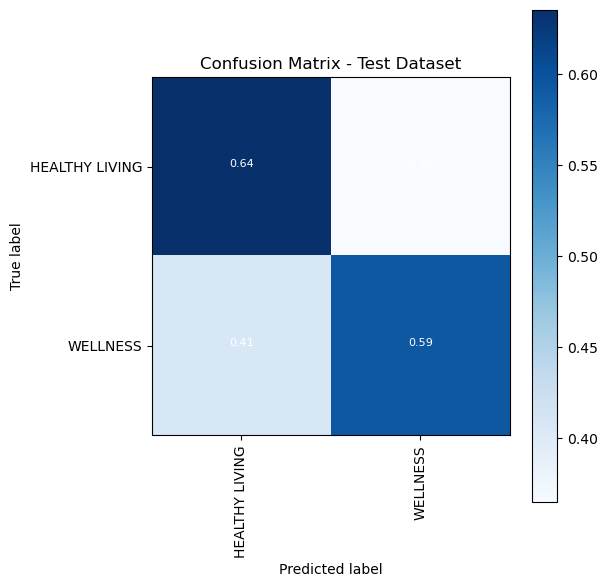

In [13]:
cm_test = confusion_matrix(y_true=df_test['category'], y_pred=predictions_labels)

plt.figure(figsize=(6,6))
plot_confusion_matrix(cm=cm_test, classes=classes, title='Confusion Matrix - Test Dataset', normalize=True)